In [1]:
import pandas as pd
from sklearn.linear_model import Ridge,Lasso,LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [7]:
data = pd.read_csv('729105428_8_data.csv')
yes_index = np.where(data['Central_Air']=='Y')[0]
no_index = np.setdiff1d(np.arange(data.shape[0]),yes_index)
data['Central_Air'][yes_index] = 1
data['Central_Air'][no_index] =0
X_ = np.array(data.iloc[:,1:])
y_ = np.array(data.iloc[:,:1])
scalar = MinMaxScaler()
X = scalar.fit_transform(X_)
y =scalar.fit_transform(y_)

/Users/james/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/james/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [3]:
line = LinearRegression()
line.fit(X,y)
line.coef_

array([[ 0.57202651,  0.16659375,  0.11972054, -0.33681715,  0.04054679,
        -0.05460625,  0.37101069, -0.00665182]])

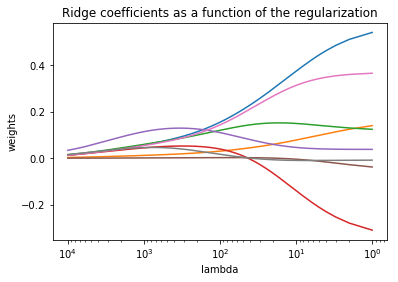

In [4]:
#ridge
alphas = np.arange(1,10001)
coefs = np.array([])
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs = np.concatenate((coefs,ridge.coef_[0]))
coefs = coefs.reshape(-1,8)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

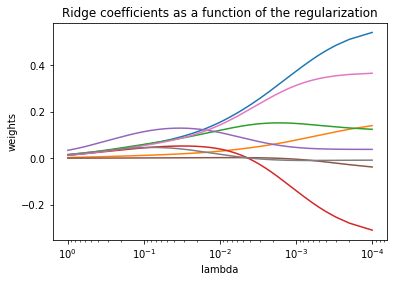

In [5]:
#lasso
X_ = np.array(data.iloc[:,1:])
y_ = np.array(data.iloc[:,:1])
alphas = np.arange(1,10001)*0.0001
coefs_ = np.array([])
for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=False)
    lasso.fit(X, y)
    coefs_ = np.concatenate((coefs_,lasso.coef_))
coefs_ = coefs_.reshape(-1,8)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

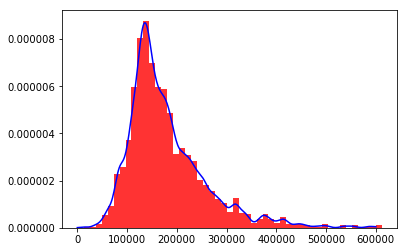

In [85]:
from sklearn.neighbors import KernelDensity
plt.hist(y_, bins=50, fc='#AAAAFF', normed=True,facecolor='r',alpha=0.8)
from scipy.stats import gaussian_kde
density = gaussian_kde(y_[:,0])
xs = np.linspace(0,600000,400)
density.covariance_factor = lambda : .1
density._compute_covariance()
plt.plot(xs,density(xs),linestyle = '-',color = 'b')
plt.show()